
<h1><left>Descrição das Variáveis do Banco de Dados</left></h1>

<table  cellspacing="0" cellpadding="0" border="1" >
  <tr>
    <th><font size="4">Variável</font></th>
    <th><font size="4">Descrição</font></th>
  </tr>

  <tr>
    <td><font size="3">Gender</font></td>
    <td><font size="3"> Gender of the passengers (Female, Male)</font></td>
  </tr>


  <tr>
    <td><font size="3">Customer Type</font></td>
    <td><font size="3">The customer type (Loyal customer, disloyal customer)</font></td>
  </tr>

  <tr>
    <td><font size="3">Age</font></td>
    <td><font size="3">The actual age of the passengers</font></td>
  </tr>

  <tr>
    <td><font size="3">Type of Travel</font></td>
    <td><font size="3">Purpose of the flight of the passengers (Personal Travel, Business Travel)</font></td>
  </tr>

  <tr>
    <td><font size="3">Class</font></td>
    <td><font size="3">Travel class in the plane of the passengers (Business, Eco, Eco Plus)</font></td>
  </tr>

  <tr>
    <td><font size="3">Flight distance</font></td>
    <td><font size="3">The flight distance of this journey</font></td>
  </tr>

  <tr>
    <td><font size="3">Inflight wifi service:</font></td>
    <td><font size="3">Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)</font></td>
  </tr>

  <tr>
    <td><font size="3">Departure/Arrival time convenient</font></td>
    <td><font size="3">Satisfaction level of Departure/Arrival time convenient</font></td>
  </tr>

  <tr>
    <td><font size="3">Ease of Online booking</font></td>
    <td><font size="3">Satisfaction level of online booking</font></td>
  </tr>

  <tr>
    <td><font size="3">Gate location</font></td>
    <td><font size="3">Satisfaction level of Gate location</font></td>
  </tr>

  <tr>
    <td><font size="3">Food and drink</font></td>
    <td><font size="3">Satisfaction level of Food and drink</font></td>
  </tr>

  <tr>
    <td><font size="3">Online boarding</font></td>
    <td><font size="3">Satisfaction level of online boarding</font></td>
  </tr>

  <tr>
    <td><font size="3">Seat comfort</font></td>
    <td><font size="3">Satisfaction level of Seat comfort</font></td>
  </tr>

  <tr>
    <td><font size="3">Inflight entertainment</font></td>
    <td><font size="3">Satisfaction level of inflight entertainment</font></td>
  </tr>

  <tr>
    <td><font size="3">On-board service</font></td>
    <td><font size="3">Satisfaction level of On-board service</font></td>
  </tr>

  <tr>
    <td><font size="3">Leg room service</font></td>
    <td><font size="3">Satisfaction level of Leg room service</font></td>
  </tr>

  <tr>
    <td><font size="3">Baggage handling</font></td>
    <td><font size="3">Satisfaction level of baggage handling</font></td>
  </tr>

  <tr>
    <td><font size="3">Check-in service</font></td>
    <td><font size="3">Satisfaction level of Check-in service</font></td>
  </tr>

  <tr>
    <td><font size="3">Inflight service</font></td>
    <td><font size="3">Satisfaction level of inflight service</font></td>
  </tr>

  <tr>
    <td><font size="3">Cleanliness</font></td>
    <td><font size="3">Satisfaction level of Cleanliness</font></td>
  </tr>

  <tr>
    <td><font size="3">Departure Delay in Minutes</font></td>
    <td><font size="3">Minutes delayed when departure</font></td>
  </tr>

  <tr>
    <td><font size="3">Arrival Delay in Minutes</font></td>
    <td><font size="3">Minutes delayed when Arrival</font></td>
  </tr>

  <tr>
    <td><font size="3">Satisfaction</font></td>
    <td><font size="3">Airline satisfaction level(Satisfaction, neutral or dissatisfaction)</font></td>
  </tr>

</table>

Referência

https://towardsdatascience.com/factor-analysis-a-complete-tutorial-1b7621890e42

In [64]:
#
######################################################################
# Checa Disponibilidade da Biblioteca 
######################################################################
#
try:
  from factor_analyzer import FactorAnalyzer
except:
  !pip install factor_analyzer


In [65]:
#
######################################################################
# Checa Disponibilidade da Biblioteca 
######################################################################
#
try:
  import missingno as msno
except:
  !pip install missingno


In [66]:
#
######################################################################
# Inclusão de Bibliotecas Necessárias
######################################################################
#
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
%matplotlib inline

from factor_analyzer import FactorAnalyzer
from sklearn.preprocessing import StandardScaler
from factor_analyzer.factor_analyzer import calculate_kmo
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity


In [79]:
def GraficoCargaFatorial ( tempFator, tempDf ):
    dfResultado = tempDf.sort_values(by=tempFator,ascending=False)
    plt.figure  ( figsize = (10,6) )
    plt.scatter(dfResultado[tempFator].index, dfResultado[tempFator].values)
    plt.plot(dfResultado[tempFator].index, dfResultado[tempFator].values)

    plt.xticks(rotation = 90)
    plt.title("Critério x Carga Fatorial", fontsize = 14, fontweight = "bold")
    plt.xlabel("Critério", fontsize = 12, fontweight = "bold")
    plt.ylabel("Carga Fatorial", fontsize = 12, fontweight = "bold") 
    plt.grid()
    plt.show()
    return

def GraficoFatoresAutovalores ( tempDf, tempEv ):
    plt.figure  ( figsize = (10,6) )
    plt.scatter(range(1,tempDf.shape[1]+1),tempEv)
    plt.plot(range(1,tempDf.shape[1]+1),tempEv)
    plt.axhline(y = 1, color = 'r', linestyle = '-')
    plt.title("Fatores x Autovalores", fontsize = 14, fontweight = "bold")
    plt.xlabel("Fatores", fontsize = 12, fontweight = "bold")
    plt.ylabel("Autovalores", fontsize = 12, fontweight = "bold") 
    plt.grid()
    plt.show()
    return

def ResumoAnaliseFatores ( tempFA, tempDf ):
    print ( "#######################################################################")
    print ( "# Resumo das Condições da Análise de Fatores")
    print ( "#######################################################################")
    print ( "# Número de Fatores .....: ", tempFA.n_factors)
    print ( "# Rotação Utilizada .....: ", tempFA.rotation)
    print ( "#######################################################################")
    return (fa.fit(tempDf))

def CriaCorrelograma ( tempDf ):
    plt.figure(figsize=(16, 15))
    Triangular = np.triu (np.ones_like(tempDf.corr()))
    PlotDados  = sns.heatmap  ( 
                              tempDf.corr(), 
                              cmap  = "YlGnBu", 
                              annot = True, 
                              mask  = Triangular,
                              fmt   = ".2f",  
                              linewidths = 2, 
                              annot_kws = { 
                                            'fontsize':11, 
                                            'fontweight':'bold'
                                           }
                              )
    plt.show()  
    return

def MostraTabela ( dfTemp, tempAlvo ):
    test_list = ["Comforto", "Serviço", "Conveniencia" ]
    while(tempAlvo in test_list):
        test_list.remove(tempAlvo)

    cm = sns.light_palette("green", as_cmap=True)
    dfParcial=dfTemp.sort_values(by=tempAlvo,ascending=False).head(10)
    dfParcial.drop((test_list),axis=1,inplace=True)
    return (dfParcial.style.background_gradient(cmap=cm))

def GraficoFatoresVariancia ( tempDf, tempFA ):

    x = tempFA.get_factor_variance()
    z = x[2]
    courses = tempDf.columns
    values  = z.tolist()

    plt.figure  ( figsize = (10,6) )
    plt.bar(courses, values, color ='lightblue', width = 0.4)
    plt.title("Fatores x Variancia Cumulativa", fontsize = 14, fontweight = "bold")
    plt.xlabel("Fatores", fontsize = 12, fontweight = "bold")
    plt.ylabel("Variancia Cumulativa", fontsize = 12, fontweight = "bold") 
    plt.grid()
    plt.show()
    return

def VerificaOutlier (tempDf):
    plt.figure  (figsize = (12, 4))
    plt.subplot (1, 3, 1)
    plt.title   ("Inflight wifi service", fontsize = 14, fontweight = "bold")
    plt.boxplot (tempDf["Inflight wifi service"])

    plt.subplot (1, 3, 2)
    plt.title   ("Departure/Arrival \ntime convenient", fontsize = 14, fontweight = "bold")
    plt.boxplot (tempDf["Departure/Arrival time convenient"])

    plt.subplot (1, 3, 3)
    plt.title   ("Ease of Online booking", fontsize = 14, fontweight = "bold")
    plt.boxplot (tempDf["Ease of Online booking"])
    plt.show    ()

    plt.figure  (figsize = (12, 4))
    plt.subplot (1, 3, 1)
    plt.title   ("Gate location", fontsize = 14, fontweight = "bold")
    plt.boxplot (tempDf["Gate location"])

    plt.subplot (1, 3, 2)
    plt.title   ("Food and drink", fontsize = 14, fontweight = "bold")
    plt.boxplot (tempDf["Food and drink"])

    plt.subplot (1, 3, 3)
    plt.title   ("Online boarding", fontsize = 14, fontweight = "bold")
    plt.boxplot (tempDf["Online boarding"])
    plt.show    ()

    plt.figure  (figsize = (12, 4))
    plt.subplot (1, 3, 1)
    plt.title   ("Seat comfort", fontsize = 14, fontweight = "bold")
    plt.boxplot (tempDf["Seat comfort"])

    plt.subplot (1, 3, 2)
    plt.title   ("Inflight entertainment", fontsize = 14, fontweight = "bold")
    plt.boxplot (tempDf["Inflight entertainment"])

    plt.subplot (1, 3, 3)
    plt.title   ("On-board service", fontsize = 14, fontweight = "bold")
    plt.boxplot (tempDf["On-board service"])
    plt.show    ()

    plt.figure  (figsize = (12, 4))
    plt.subplot (1, 3, 1)
    plt.title   ("Leg room service", fontsize = 14, fontweight = "bold")
    plt.boxplot (tempDf["Leg room service"])

    plt.subplot (1, 3, 2)
    plt.title   ("Baggage handling", fontsize = 14, fontweight = "bold")
    plt.boxplot (tempDf["Baggage handling"])

    plt.subplot (1, 3, 3)
    plt.title   ("Checkin service", fontsize = 14, fontweight = "bold")
    plt.boxplot (tempDf["Checkin service"])
    plt.show    ()

    plt.figure  (figsize = (12, 4))
    plt.subplot (1, 2, 1)
    plt.title   ("Inflight service", fontsize = 14, fontweight = "bold")
    plt.boxplot (tempDf["Inflight service"])

    plt.subplot (1, 2, 2)
    plt.title   ("Cleanliness", fontsize = 14, fontweight = "bold")
    plt.boxplot (tempDf["Cleanliness"])
    plt.show    ()  
    return


In [68]:
#
######################################################################
# Montando o Diretorio de Dados
######################################################################
#
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [69]:
#
#######################################################################
# Definições Gerais
#######################################################################
#
CaminhoCSV   = "/content/drive/MyDrive/Factor Analysis/Dados/"
ArquivoCSV   = "Passenger.csv"


In [70]:
#
#######################################################################
# Lendo o Arquivo
#######################################################################
#
dfBase = pd.read_csv( CaminhoCSV + ArquivoCSV ) 
dfBase.head()


,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [71]:
#
#######################################################################
# Limpando a Base de Dados
#######################################################################
#
dfBase.drop(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class', 'satisfaction'],axis=1,inplace=True)
dfBase.dropna(inplace=True)
dfBase.head()


,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,160,5,4,3,4,3,4,3,5,5,5,5,2,5,5,50,44.0
1,2863,1,1,3,1,5,4,5,4,4,4,4,3,4,5,0,0.0
2,192,2,0,2,4,2,2,2,2,4,1,3,2,2,2,0,0.0
3,3377,0,0,0,2,3,4,4,1,1,1,1,3,1,4,0,6.0
4,1182,2,3,4,3,4,1,2,2,2,2,2,4,2,4,0,20.0


In [72]:
#
#######################################################################
# Verificando pré-condições
#######################################################################
#
NumeroObservacoes = len(dfBase) 
NumeroCriterios   = len(dfBase.columns)
print ( "#######################################################################")
print ( "# Critérios de Aceitação da Amostra")
print ( "#######################################################################")
print ( "# Quantidade de Registros ...: ", "Reprovado" if (NumeroObservacoes <= 100) else "Aprovado")
print ( "# Densidade de Registros ....: ", "Reprovado" if (NumeroCriterios*5 >= NumeroObservacoes) else "Aprovado")
print ( "#######################################################################")


#######################################################################
# Critérios de Aceitação da Amostra
#######################################################################
# Quantidade de Registros ...:  Aprovado
# Densidade de Registros ....:  Aprovado
#######################################################################


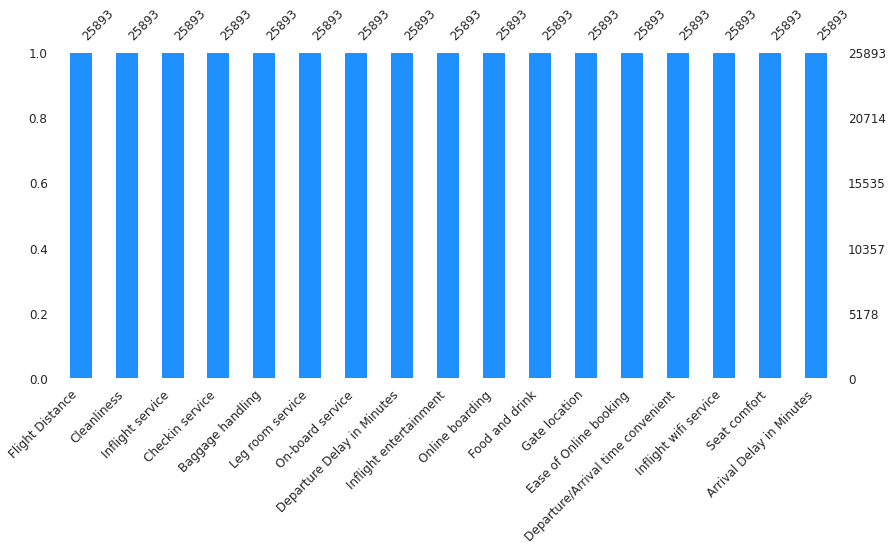

In [73]:
#
#######################################################################
# Avaliando se Há Dados Faltantes
#######################################################################
#
msno.bar(dfBase, color="dodgerblue", sort="ascending", figsize=(14,6), fontsize=12);


In [74]:
#
#######################################################################
# Dataframe com Somente os Critérios
#######################################################################
#
dfCriterios = dfBase.copy()
dfCriterios.head()


,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,160,5,4,3,4,3,4,3,5,5,5,5,2,5,5,50,44.0
1,2863,1,1,3,1,5,4,5,4,4,4,4,3,4,5,0,0.0
2,192,2,0,2,4,2,2,2,2,4,1,3,2,2,2,0,0.0
3,3377,0,0,0,2,3,4,4,1,1,1,1,3,1,4,0,6.0
4,1182,2,3,4,3,4,1,2,2,2,2,2,4,2,4,0,20.0


In [75]:
#Se a matriz de correlações não revelar um número
#substancial de valores superiores a 0,30 há fortes
#indícios de que a utilização da técnica não é apropriada

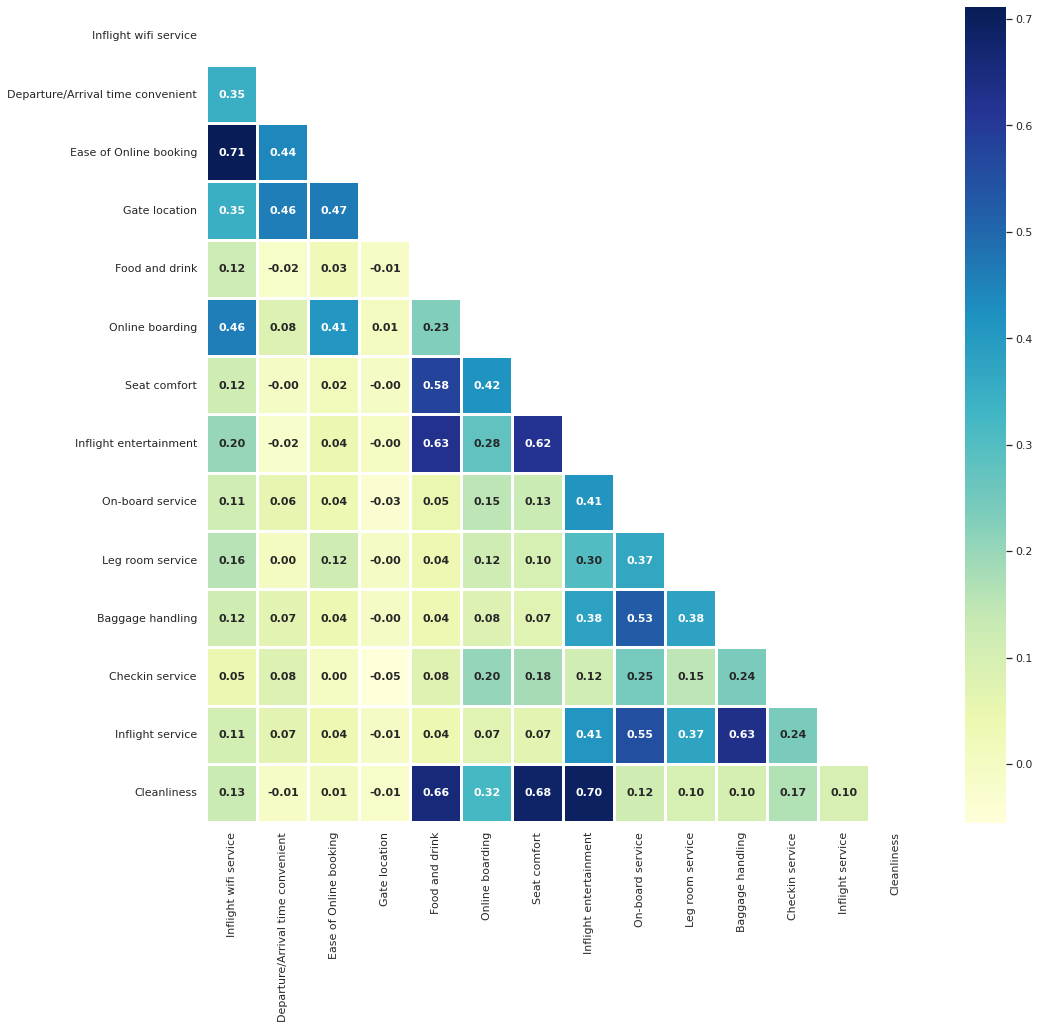

In [80]:
#
#######################################################################
# Criando o Correlograma
#######################################################################
#
CriaCorrelograma ( dfCriterios )


**NOTA IMPORTANTE**

Algumas variáveis são altamente correlacionadas, especialmente aquelas relacionadas às respostas da pesquisa. 

Porém, o que realmente chama a atenção é a correlação extremamente alta (0,98) entre o “Departure Delay in Minutes” e o “Arrival Delay in Minutes”. Isso faz sentido. 

Se o avião sair mais tarde do que o esperado, deve chegar mais tarde também. Considerando essa correlação extremamente alta, decidi apenas remover essa coluna do conjunto de dados.

In [77]:
#
#######################################################################
# Limpando a Base de Dados
#######################################################################
#
dfCriterios.drop(['Arrival Delay in Minutes', 'Departure Delay in Minutes', 'Flight Distance'],axis=1,inplace=True)
dfCriterios.dropna(inplace=True)
dfCriterios.head()


,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
0,5,4,3,4,3,4,3,5,5,5,5,2,5,5
1,1,1,3,1,5,4,5,4,4,4,4,3,4,5
2,2,0,2,4,2,2,2,2,4,1,3,2,2,2
3,0,0,0,2,3,4,4,1,1,1,1,3,1,4
4,2,3,4,3,4,1,2,2,2,2,2,4,2,4


In [14]:

#Inflight wifi service       
#Departure/Arrival time convenient   
#Ease of Online booking               
#Gate location                        
#Food and drink                       
#Online boarding                      
#Seat comfort                         
#Inflight entertainment               
#On-board service                     
#Leg room service                     
#Baggage handling                     
#Checkin service                      
#Inflight service                     
#Cleanliness


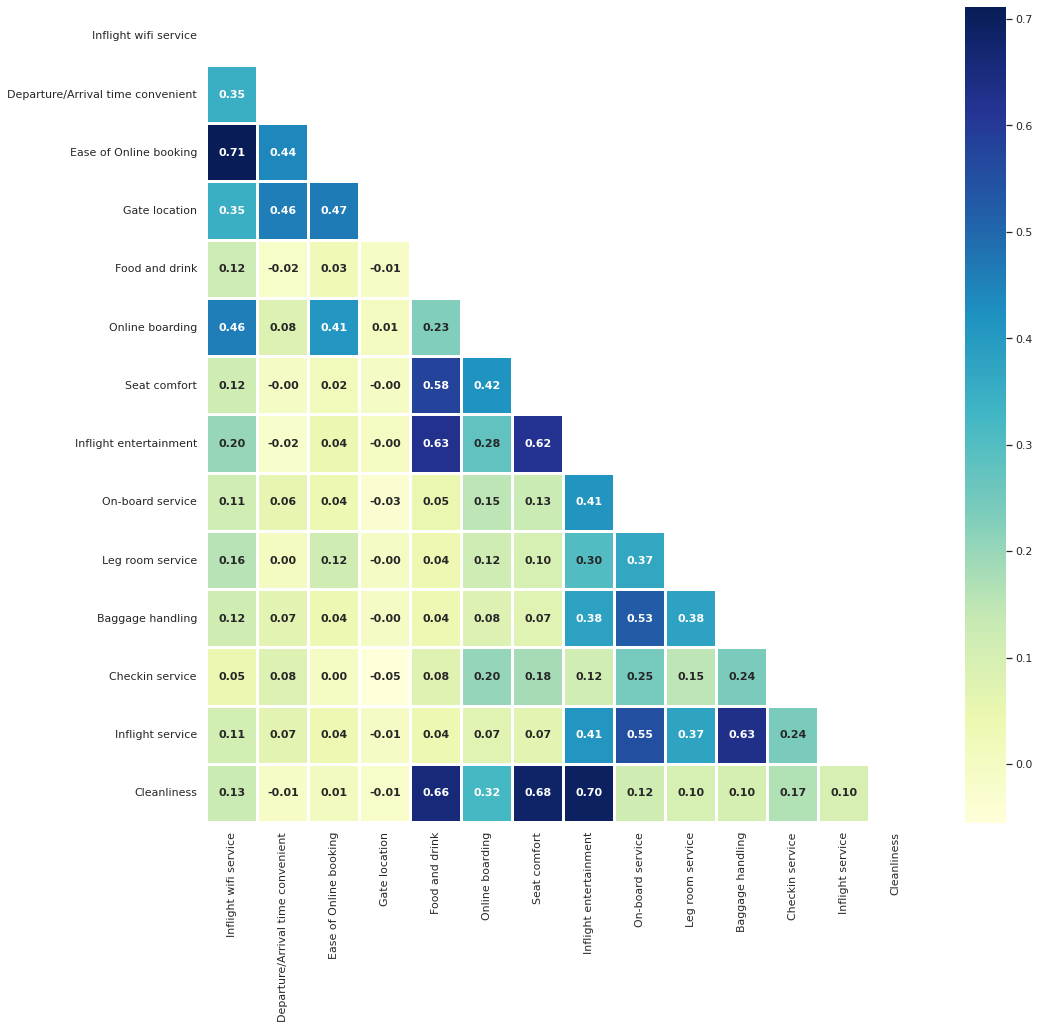

In [81]:
#
#######################################################################
# Criando o Correlograma
#######################################################################
#
CriaCorrelograma ( dfCriterios )


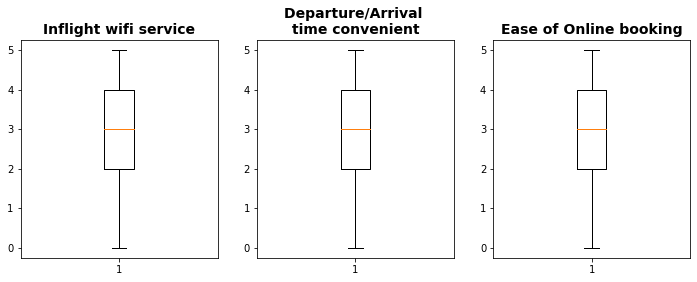

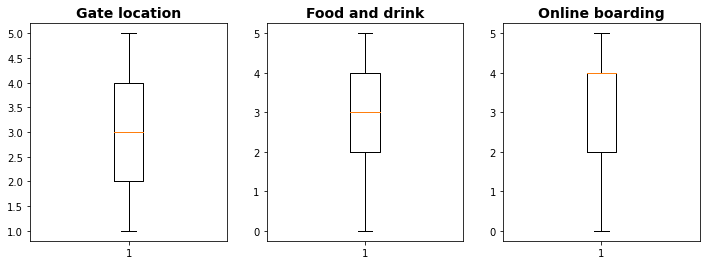

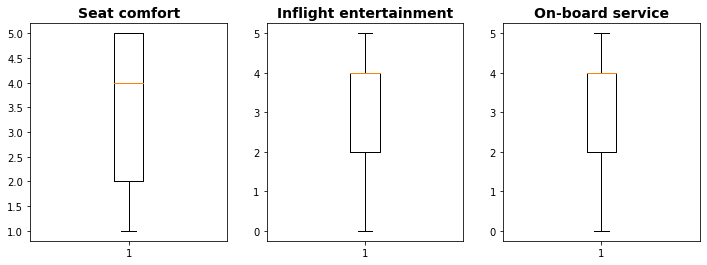

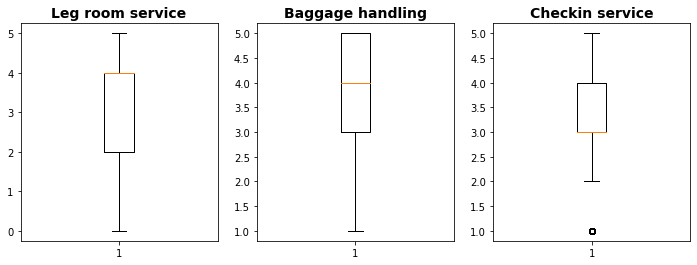

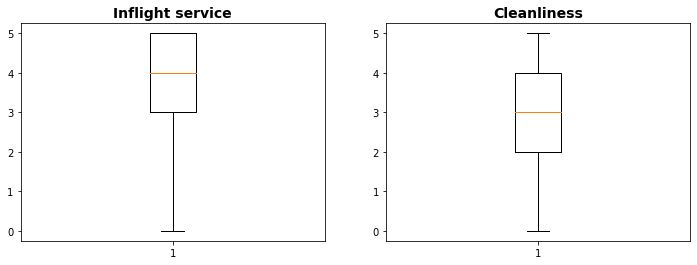

In [16]:
#
#######################################################################
# Avaliando a Presença de Outlier
#######################################################################
#
VerificaOutlier (dfCriterios)


In [17]:
#
#######################################################################
# Padroniza a Escala 
#######################################################################
#
scaler    = StandardScaler()
dataframe = scaler.fit_transform(dfCriterios)
dfZscaleCriterios = pd.DataFrame(data=dataframe,columns=dfCriterios.columns)
dfZscaleCriterios.head(10)


,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
0,1.705489,0.622058,0.172743,0.798634,-0.161369,0.544741,-0.340006,1.227409,1.259285,1.251091,1.162491,-1.035295,1.144456,1.299508
1,-1.291472,-1.334964,0.172743,-1.542123,1.340280,0.544741,1.174883,0.480370,0.479258,0.492953,0.312294,-0.247344,0.297449,1.299508
2,-0.542232,-1.987305,-0.535209,0.798634,-0.912194,-0.930752,-1.097451,-1.013710,0.479258,-1.781463,-0.537903,-1.035295,-1.396566,-0.974375
3,-2.040712,-1.987305,-1.951113,-0.761871,-0.161369,0.544741,0.417438,-1.760750,-1.860820,-1.781463,-2.238298,-0.247344,-2.243573,0.541547
4,-0.542232,-0.030283,0.880696,0.018382,0.589455,-1.668499,-1.097451,-1.013710,-1.080794,-1.023325,-1.388101,0.540608,-1.396566,0.541547
5,0.207008,-0.030283,0.172743,0.018382,1.340280,1.282487,-0.340006,1.227409,0.479258,-0.265186,-2.238298,-1.823246,-1.396566,1.299508
6,1.705489,1.274398,1.588648,1.578887,-0.161369,1.282487,1.174883,1.227409,1.259285,1.251091,1.162491,0.540608,1.144456,-0.216414
7,-0.542232,-0.682624,-0.535209,-0.761871,0.589455,0.544741,1.174883,0.480370,0.479258,0.492953,0.312294,1.328559,0.297449,-0.216414
8,1.705489,-0.682624,-0.535209,-0.761871,1.340280,1.282487,1.174883,1.227409,-1.080794,-1.023325,1.162491,-0.247344,-0.549559,1.299508
9,-0.542232,-0.682624,-0.535209,-0.761871,-0.161369,0.544741,0.417438,0.480370,0.479258,0.492953,0.312294,1.328559,0.297449,0.541547


In [18]:
#
#######################################################################
# Executa o Bartlett Teste
#######################################################################
#
chi2,p = calculate_bartlett_sphericity(dfZscaleCriterios)
print ( "#######################################################################")
print ( "# Teste de Esfericidade de Bartlett")
print ( "#######################################################################")
print ( "# Chi quadrado .....: ",chi2)
print ( "# p valor ..........: ",p)
print ( "#######################################################################")


#######################################################################
# Teste de Esfericidade de Bartlett
#######################################################################
# Chi quadrado .....:  151817.62779745302
# p valor ..........:  0.0
#######################################################################


In [19]:
#
#######################################################################
# Executa o KMO Teste
#######################################################################
#
kmo_all,kmo_model = calculate_kmo(dfZscaleCriterios)
print ( "#######################################################################")
print ( "# Estatística de Teste KMO")
print ( "#######################################################################")
print ( "# Resultado ....: ",kmo_model)
print ( "#######################################################################")

#######################################################################
# Estatística de Teste KMO
#######################################################################
# Resultado ....:  0.7825563951174125
#######################################################################


In [20]:
#
#######################################################################
# Criando a Análise Fatorial 
#######################################################################
#
fa = FactorAnalyzer   (
                        n_factors = len(dfZscaleCriterios.columns), 
                        rotation  = 'varimax'
                      )
Resultado = ResumoAnaliseFatores ( fa, dfZscaleCriterios )


#######################################################################
# Resumo das Condições da Análise de Fatores
#######################################################################
# Número de Fatores .....:  14
# Rotação Utilizada .....:  varimax
#######################################################################


In [21]:
#
#######################################################################
# Calcula os AutoVetores e AutoValores
#######################################################################
#
AutoValores, AutoVetores = fa.get_eigenvalues()
AutoValores


array([3.78900383, 2.40921259, 2.18023977, 1.06371519, 0.94370855,
       0.6886748 , 0.52835134, 0.5076056 , 0.4624326 , 0.36534594,
       0.33021639, 0.28705001, 0.259114  , 0.18532939])

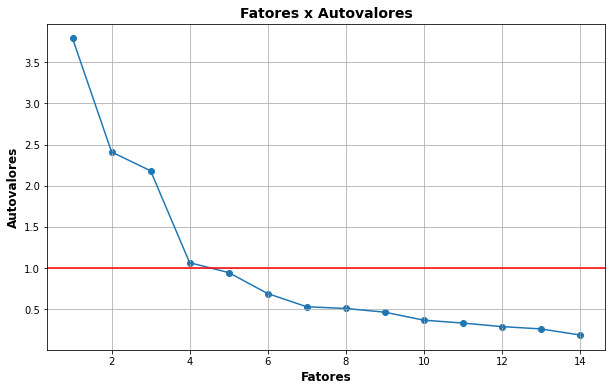

In [22]:
#
#######################################################################
# Grafico do Fatores x Autovalores
#######################################################################
#
GraficoFatoresAutovalores ( dfZscaleCriterios, AutoValores )


In [23]:
#
#######################################################################
# Análise Fatorial com fatores rotacionados
#######################################################################
#
fa = FactorAnalyzer ( n_factors=3, rotation='varimax')
Resultado = ResumoAnaliseFatores ( fa, dfZscaleCriterios )


#######################################################################
# Resumo das Condições da Análise de Fatores
#######################################################################
# Número de Fatores .....:  3
# Rotação Utilizada .....:  varimax
#######################################################################


In [24]:
#
#######################################################################
# Obtenha a Variância de Cada Fator
#######################################################################
#
#with np.printoptions(suppress=True,precision=2):
dfResultado = pd.DataFrame(fa.get_factor_variance(),index=['Variância','Variância Proporcional','Variancia Cumulativa'])
dfResultado.columns = ['Comforto','Serviço','Conveniencia']
dfResultado


,Comforto,Serviço,Conveniencia
Variância,2.714841,2.319228,2.105815
Variância Proporcional,0.193917,0.165659,0.150415
Variancia Cumulativa,0.193917,0.359576,0.509992


In [25]:
#Comfort: Food and Drink, Seat comfort, Inflight entertainment, Cleanliness
#Service: Onboard service, Baggage Handling, Inflight Service
#Convenience: In flight Wifi, Departure/Arrival time convenience, Online Booking, Gate Location.

In [28]:
#
#######################################################################
# Matriz de Cargas Fatoriais Estimada
#######################################################################
#
dfCargasFatoriais = pd.DataFrame(fa.loadings_)
np.round(dfCargasFatoriais,2)
dfCargasFatoriais.index = dfZscaleCriterios.columns
dfCargasFatoriais.columns = ['Comforto','Serviço','Conveniencia']
dfCargasFatoriais


,Comforto,Serviço,Conveniencia
Inflight wifi service,0.162701,0.127447,0.760758
Departure/Arrival time convenient,-0.046389,0.051076,0.514116
Ease of Online booking,0.029097,0.026888,0.921655
Gate location,-0.038732,-0.038737,0.518934
Food and drink,0.756076,0.012418,-0.002491
Online boarding,0.388069,0.113618,0.366688
Seat comfort,0.796592,0.076939,0.023960
Inflight entertainment,0.749945,0.467058,0.008904
On-board service,0.083487,0.706463,0.026110
Leg room service,0.073124,0.490125,0.082668


In [76]:
#
#######################################################################
# Obtenha a Variância de Cada Fator
#######################################################################
#
with np.printoptions(suppress=True,precision=6):
    dfResultado = pd.DataFrame(fa.get_factor_variance(),index=['Variância','Variância Proporcional','Variância Cumulativa'])

dfResultado.columns = ['Comforto','Serviço','Conveniencia']
dfResultado

,Comforto,Serviço,Conveniencia
Variância,2.714841,2.319228,2.105815
Variância Proporcional,0.193917,0.165659,0.150415
Variância Cumulativa,0.193917,0.359576,0.509992


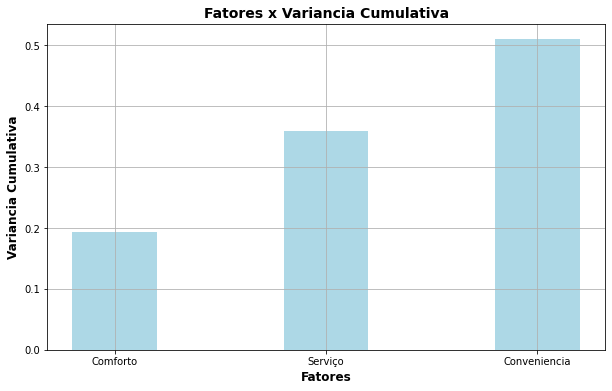

In [77]:
#
#######################################################################
# Entendendo a Variância Cumulativa
#######################################################################
#
GraficoFatoresVariancia ( dfResultado, fa )


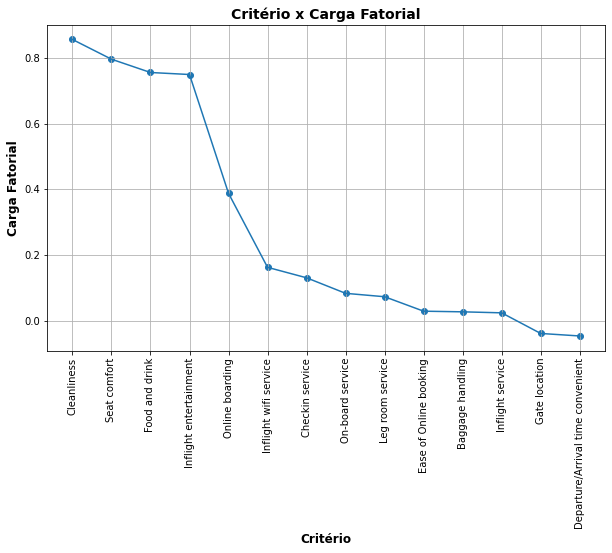

In [78]:
#
#######################################################################
# Gráfico dos Critérios x Carga Fatorial
#######################################################################
#
GraficoCargaFatorial ( 'Comforto', dfCargasFatoriais )


In [79]:
#
#######################################################################
# Identificando os Critérios Significativos 
#######################################################################
#
MostraTabela ( dfCargasFatoriais, "Comforto" )


,Comforto
Cleanliness,0.856682
Seat comfort,0.796592
Food and drink,0.756076
Inflight entertainment,0.749945
Online boarding,0.388069
Inflight wifi service,0.162701
Checkin service,0.130799
On-board service,0.083487
Leg room service,0.073124
Ease of Online booking,0.029097


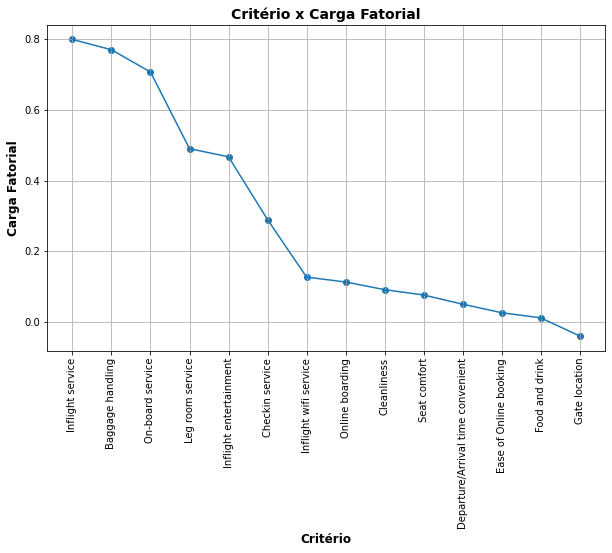

In [80]:
#
#######################################################################
# Gráfico dos Critérios x Carga Fatorial
#######################################################################
#
GraficoCargaFatorial ( 'Serviço', dfCargasFatoriais )


In [81]:
#
#######################################################################
# Identificando os Critérios Significativos 
#######################################################################
#
MostraTabela ( dfCargasFatoriais, "Serviço" )


,Serviço
Inflight service,0.798361
Baggage handling,0.769344
On-board service,0.706463
Leg room service,0.490125
Inflight entertainment,0.467058
Checkin service,0.289795
Inflight wifi service,0.127447
Online boarding,0.113618
Cleanliness,0.091995
Seat comfort,0.076939


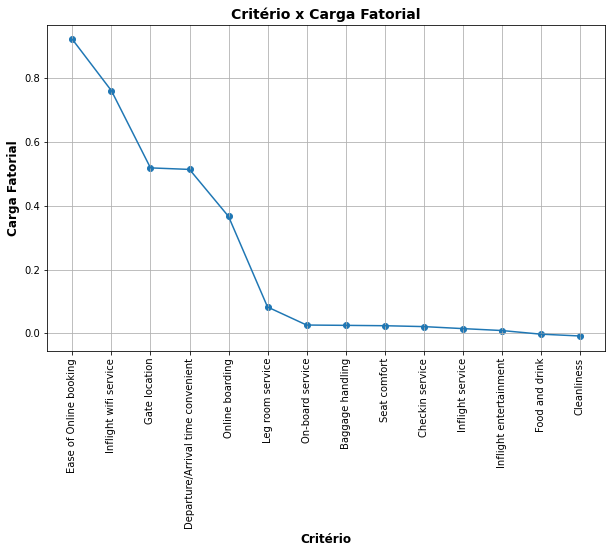

In [82]:
#
#######################################################################
# Gráfico dos Critérios x Carga Fatorial
#######################################################################
#
GraficoCargaFatorial ( 'Conveniencia', dfCargasFatoriais )


In [83]:
#
#######################################################################
# Identificando os Critérios Significativos 
#######################################################################
#
MostraTabela ( dfCargasFatoriais, "Conveniencia" )


,Conveniencia
Ease of Online booking,0.921655
Inflight wifi service,0.760758
Gate location,0.518934
Departure/Arrival time convenient,0.514116
Online boarding,0.366688
Leg room service,0.082668
On-board service,0.026110
Baggage handling,0.025103
Seat comfort,0.023960
Checkin service,0.021218


In [ ]:
#######################################################################
# REVER O VÍDEO
#######################################################################

In [31]:
#
#######################################################################
# Variância explicada por cada fator
#######################################################################
#
fa.get_factor_variance()

(array([2.71484097, 2.31922834, 2.10581477]),
 array([0.19391721, 0.16565917, 0.15041534]),
 array([0.19391721, 0.35957638, 0.50999172]))

In [ ]:
np.sum(fa.get_factor_variance())

12.405097758109799

In [ ]:
np.round(fa.get_communalities(),2)

array([0.2 , 0.46, 0.54, 0.3 , 0.47, 0.35, 0.45, 0.32, 0.48, 0.44, 0.35,
       0.55, 0.44, 0.54, 0.41, 0.68, 0.61, 0.54, 0.51, 0.35, 0.32, 0.27,
       0.47, 0.25, 0.3 ])

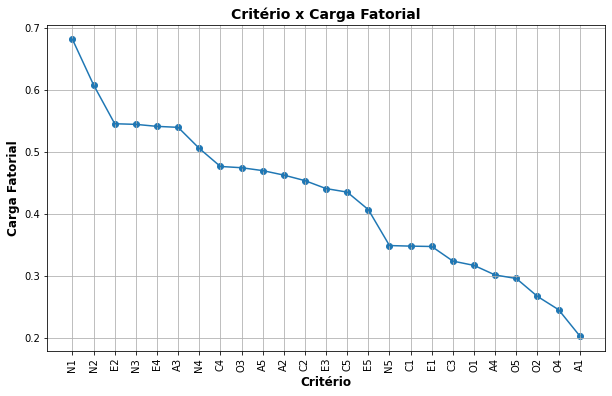

In [ ]:
x=pd.DataFrame(fa.get_communalities(),index=dfZscaleCriterios.columns,columns=['Communalities'])
x.sort_values(by='Communalities',ascending=False)
GraficoCargaFatorial ( 'Communalities', x )

In [ ]:
fa.get_factor_variance()/np.sum(fa.get_factor_variance())

array([[0.21842896, 0.19936077, 0.16453765, 0.14868871, 0.12270383],
       [0.00873716, 0.00797443, 0.00658151, 0.00594755, 0.00490815],
       [0.00873716, 0.01671159, 0.0232931 , 0.02924064, 0.0341488 ]])

In [ ]:
#
#######################################################################
# Variância percentual explicada por cada fator
#######################################################################
#
np.round(fa.get_factor_variance()/np.sum(fa.get_factor_variance()),2)


array([[0.22, 0.2 , 0.16, 0.15, 0.12],
       [0.01, 0.01, 0.01, 0.01, 0.  ],
       [0.01, 0.02, 0.02, 0.03, 0.03]])

In [ ]:
#
#######################################################################
# 
#######################################################################
#
dfBase[['Fator1','Fator2','Fator3','Fator4']] = np.array(fa.fit_transform(dfBase))[:, 0:4]
dfBase

,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,...,N5,O1,O2,O3,O4,O5,Fator1,Fator2,Fator3,Fator4
0,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,4.0,...,3.0,3.0,6,3.0,4.0,3.0,-0.439830,0.103897,-1.216713,-0.696215
1,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,4.0,...,5.0,4.0,2,4.0,3.0,3.0,0.084369,0.559311,-0.601521,-0.189341
2,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,5.0,...,3.0,4.0,2,5.0,5.0,2.0,0.520534,0.318235,0.025646,-0.751136
3,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,5.0,...,1.0,3.0,3,4.0,3.0,5.0,-0.197064,0.057696,-1.019263,0.064286
4,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,2.0,...,3.0,3.0,3,4.0,3.0,3.0,-0.329835,0.408754,-0.058843,-0.820454
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2793,3.0,4.0,3.0,1.0,3.0,5.0,4.0,5.0,3.0,4.0,...,6.0,6.0,1,4.0,5.0,2.0,1.308046,-1.152403,-0.104197,-1.146411
2794,5.0,5.0,5.0,5.0,3.0,5.0,4.0,2.0,3.0,5.0,...,2.0,6.0,1,5.0,6.0,2.0,0.732472,0.252206,-0.587511,-0.317781
2797,2.0,3.0,5.0,2.0,5.0,5.0,5.0,5.0,1.0,1.0,...,1.0,5.0,1,6.0,4.0,3.0,-0.223267,0.721169,0.787110,-1.058480
2798,5.0,2.0,2.0,4.0,4.0,5.0,5.0,5.0,2.0,6.0,...,1.0,5.0,2,5.0,5.0,1.0,0.920520,0.749337,0.070953,-2.135145


In [ ]:
#
#######################################################################
# 
#######################################################################
#
dfBase.sort_values(by='Fator1',ascending=False).head()


,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,...,N5,O1,O2,O3,O4,O5,Fator1,Fator2,Fator3,Fator4
2750,6.0,5.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,...,6.0,5.0,6,5.0,6.0,6.0,2.738694,0.286397,0.227182,0.757207
1559,1.0,6.0,6.0,1.0,1.0,5.0,6.0,6.0,4.0,6.0,...,6.0,6.0,6,4.0,6.0,1.0,2.551124,-0.776640,0.154033,0.163704
1963,6.0,6.0,4.0,6.0,3.0,4.0,6.0,3.0,6.0,5.0,...,6.0,6.0,6,4.0,6.0,1.0,2.521864,0.985519,-0.563857,-0.058583
1928,5.0,2.0,6.0,5.0,5.0,6.0,5.0,6.0,6.0,6.0,...,6.0,6.0,5,6.0,6.0,6.0,2.509006,-0.150189,-0.444443,0.102387
369,6.0,6.0,6.0,6.0,6.0,3.0,6.0,2.0,5.0,5.0,...,6.0,6.0,5,5.0,6.0,2.0,2.463199,1.491950,-0.788668,0.779240


In [ ]:
#
#######################################################################
# 
#######################################################################
#
dfBase.sort_values(by='Fator2',ascending=False).head()


,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,...,N5,O1,O2,O3,O4,O5,Fator1,Fator2,Fator3,Fator4
2323,6.0,6.0,6.0,6.0,6.0,6.0,4.0,1.0,2.0,1.0,...,4.0,6.0,1,6.0,3.0,1.0,1.292419,2.461448,0.264077,-0.385294
2066,6.0,1.0,6.0,6.0,5.0,4.0,1.0,1.0,4.0,4.0,...,1.0,6.0,1,6.0,5.0,1.0,0.420021,2.336969,-1.788528,-1.447988
1972,3.0,6.0,6.0,6.0,6.0,3.0,6.0,1.0,1.0,3.0,...,1.0,6.0,1,6.0,6.0,1.0,1.210472,2.108361,0.021743,0.095301
19,4.0,4.0,6.0,5.0,5.0,1.0,1.0,1.0,5.0,6.0,...,1.0,4.0,1,5.0,3.0,2.0,0.268337,2.096824,-2.582866,-0.667661
525,6.0,6.0,6.0,6.0,6.0,5.0,6.0,6.0,1.0,1.0,...,6.0,6.0,6,6.0,6.0,1.0,1.832939,2.008208,1.532486,0.169405


In [ ]:
#
#######################################################################
# 
#######################################################################
#
dfBase.sort_values(by='Fator3',ascending=False).head(15)


,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,...,N5,O1,O2,O3,O4,O5,Fator1,Fator2,Fator3,Fator4
660,6.0,1.0,1.0,1.0,1.0,6.0,6.0,6.0,1.0,1.0,...,1.0,6.0,1,6.0,6.0,1.0,1.402408,-1.456563,1.941907,-3.611214
1847,5.0,2.0,3.0,4.0,2.0,6.0,6.0,6.0,1.0,1.0,...,1.0,5.0,1,5.0,4.0,2.0,0.190139,-0.669040,1.919843,-2.658308
2345,1.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,1.0,1.0,...,6.0,6.0,4,2.0,6.0,1.0,2.138446,-1.901717,1.893386,1.268549
2767,1.0,6.0,5.0,6.0,4.0,6.0,6.0,6.0,1.0,1.0,...,5.0,5.0,6,2.0,5.0,4.0,1.019529,-0.612462,1.892995,0.718970
2188,1.0,6.0,5.0,6.0,4.0,6.0,6.0,6.0,1.0,2.0,...,6.0,4.0,4,2.0,5.0,2.0,1.660123,-1.688377,1.861211,0.574268
1607,3.0,4.0,2.0,4.0,1.0,6.0,6.0,5.0,1.0,1.0,...,5.0,4.0,2,2.0,6.0,1.0,-0.466256,-2.174017,1.827764,-1.431398
1419,3.0,6.0,3.0,6.0,1.0,6.0,6.0,5.0,1.0,1.0,...,5.0,5.0,4,1.0,4.0,5.0,0.143368,-0.450002,1.771687,-0.911661
438,4.0,5.0,6.0,6.0,3.0,6.0,6.0,6.0,1.0,1.0,...,2.0,6.0,1,6.0,6.0,1.0,1.576748,0.543868,1.765355,-0.479058
2281,2.0,2.0,1.0,6.0,4.0,6.0,6.0,6.0,1.0,1.0,...,4.0,4.0,1,1.0,6.0,1.0,0.095532,-1.976483,1.742017,-1.583543
2419,3.0,5.0,2.0,6.0,2.0,6.0,5.0,6.0,1.0,1.0,...,1.0,2.0,4,2.0,5.0,4.0,-0.995929,-1.402891,1.731241,-1.247259


In [ ]:
#
#######################################################################
# 
#######################################################################
#
dfBase.sort_values(by='Fator4',ascending=False).head(15)


,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,...,N5,O1,O2,O3,O4,O5,Fator1,Fator2,Fator3,Fator4
2388,1.0,6.0,6.0,6.0,6.0,3.0,3.0,5.0,3.0,5.0,...,6.0,2.0,5,4.0,6.0,3.0,-0.174876,-0.769936,-1.052447,2.179653
45,1.0,6.0,6.0,6.0,6.0,5.0,2.0,1.0,2.0,1.0,...,5.0,6.0,5,6.0,6.0,1.0,0.046553,-0.440298,-0.659571,1.912662
2084,2.0,6.0,5.0,6.0,6.0,5.0,6.0,6.0,1.0,6.0,...,4.0,3.0,6,5.0,6.0,1.0,-0.125993,-2.657193,0.522773,1.814662
2435,1.0,6.0,6.0,6.0,6.0,6.0,5.0,4.0,1.0,1.0,...,6.0,5.0,1,4.0,5.0,2.0,-0.101711,-0.769039,0.820267,1.730468
632,2.0,6.0,6.0,6.0,6.0,5.0,5.0,5.0,2.0,3.0,...,6.0,6.0,2,6.0,6.0,2.0,0.726201,-0.893246,0.425820,1.722703
113,1.0,6.0,6.0,6.0,6.0,6.0,6.0,5.0,1.0,6.0,...,6.0,6.0,1,6.0,6.0,2.0,0.803961,-1.228954,0.740153,1.703841
1673,1.0,6.0,6.0,6.0,6.0,5.0,5.0,4.0,5.0,4.0,...,5.0,6.0,1,6.0,6.0,1.0,0.329407,0.466053,-0.702645,1.687733
485,1.0,5.0,6.0,6.0,6.0,6.0,5.0,5.0,5.0,1.0,...,5.0,6.0,6,6.0,6.0,5.0,-0.405564,-0.765158,0.179378,1.687702
422,1.0,6.0,6.0,5.0,6.0,6.0,5.0,6.0,2.0,2.0,...,6.0,6.0,5,3.0,6.0,1.0,0.691527,-1.317658,0.876564,1.687460
416,1.0,5.0,6.0,6.0,6.0,1.0,5.0,6.0,4.0,1.0,...,6.0,6.0,5,2.0,6.0,5.0,0.295099,-1.718769,0.144321,1.668052


In [ ]:
with np.printoptions(precision=4,suppress=True):
    print(pd.DataFrame(fa.get_communalities(),index=dfZscaleCriterios.columns,columns=['Communalities']))

    Communalities
A1       0.203905
A2       0.462803
A3       0.539692
A4       0.301905
A5       0.470020
C1       0.348395
C2       0.453872
C3       0.324289
C4       0.476699
C5       0.435383
E1       0.347809
E2       0.545502
E3       0.441055
E4       0.541257
E5       0.407146
N1       0.681398
N2       0.608003
N3       0.544475
N4       0.505803
N5       0.349316
O1       0.317339
O2       0.267452
O3       0.474643
O4       0.246035
O5       0.296284


In [ ]:
with np.printoptions(suppress=True,precision=6):
    print(pd.DataFrame(fa.get_uniquenesses(),index=dfZscaleCriterios.columns,columns=['Uniqueness']))

    Uniqueness
A1    0.796095
A2    0.537197
A3    0.460308
A4    0.698095
A5    0.529980
C1    0.651605
C2    0.546128
C3    0.675711
C4    0.523301
C5    0.564617
E1    0.652191
E2    0.454498
E3    0.558945
E4    0.458743
E5    0.592854
N1    0.318602
N2    0.391997
N3    0.455525
N4    0.494197
N5    0.650684
O1    0.682661
O2    0.732548
O3    0.525357
O4    0.753965
O5    0.703716


In [ ]:
#
#######################################################################
# 
#######################################################################
#
